In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

In [9]:
rat = "desktop/Rat_Sightings.csv"
rat_df = pd.read_csv(rat)
rat_df

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15633054,01/01/2010 11:20:45 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11365.0,59-13 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)"
1,15633304,01/02/2010 12:50:36 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10016.0,2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743161,-73.976983,"(40.74316088098852, -73.97698314758436)"
2,15633594,01/01/2010 03:05:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11377.0,31-14 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756987,-73.903618,"(40.756986581184535, -73.90361811283164)"
3,15633599,01/01/2010 08:52:19 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11201.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688903,-73.980929,"(40.68890317557533, -73.98092864957985)"
4,15633605,01/01/2010 04:14:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2504 BRONX PARK EAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863614,-73.870441,"(40.8636140600279, -73.87044117516707)"
5,15633803,01/01/2010 08:29:58 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,202 PULASKI STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692989,-73.943771,"(40.69298896011082, -73.94377050323628)"
6,15633828,01/01/2010 02:15:27 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Building,11218.0,900 CONEY ISLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)"
7,15633896,01/01/2010 12:11:51 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10027.0,317 WEST 120 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)"
8,15633897,01/01/2010 12:12:04 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10458.0,2356 LORILLARD PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)"
9,15634275,01/01/2010 11:46:51 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11201.0,532 FULTON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)"


In [12]:
clean_df = rat_df [["Created Date", "Closed Date", "Location Type","Borough","Latitude", "Longitude"]]
clean_df.head()

,Created Date,Closed Date,Location Type,Borough,Latitude,Longitude
0,01/01/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,40.739983,-73.809299
1,01/02/2010 12:50:36 AM,NaN,Commercial Building,MANHATTAN,40.743161,-73.976983
2,01/01/2010 03:05:37 PM,NaN,3+ Family Apt. Building,QUEENS,40.756987,-73.903618
3,01/01/2010 08:52:19 PM,NaN,Other (Explain Below),BROOKLYN,40.688903,-73.980929
4,01/01/2010 04:14:27 PM,NaN,3+ Family Apt. Building,BRONX,40.863614,-73.870441


In [30]:
clean_df.drop(clean_df[clean_df.Borough=='Unspecified'].index, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
clean_df['Borough'].value_counts()

BROOKLYN         42515
MANHATTAN        31917
BRONX            24561
QUEENS           17857
STATEN ISLAND     5792
Name: Borough, dtype: int64

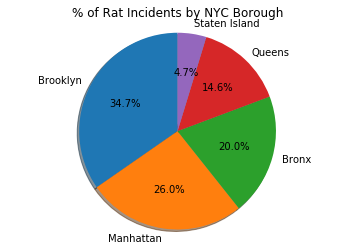

In [36]:
labels = ["Brooklyn", "Manhattan", "Bronx",'Queens', 'Staten Island']
sizes = clean_df['Borough'].value_counts()
explode = (0, .6, 0)
plt.pie(sizes,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Rat Incidents by NYC Borough")
plt.axis("equal")
plt.show()